# Contents were gather from the following:

## Kaggle DataSource:
[Hourly Energy Consumption](https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption)

## Types of Time Series Data
![Forecasting Models](https://miro.medium.com/v2/resize:fit:720/format:webp/1*V_RKPeIxCB9CS_2SsLyKXw.jpeg)

From: [Time series Forecasting in Machine Learning](https://engineering.99x.io/time-series-forecasting-in-machine-learning-3972f7a7a467)

# Imports

## Libraries and Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

## Data

In [2]:
DATA_PATH = '../Data/'

df = pd.read_csv(DATA_PATH + 'PJME_hourly.csv')

In [3]:
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [4]:
df.dtypes

Datetime     object
PJME_MW     float64
dtype: object

# Data Transformation

## Change Datetime to the correct data type and set as table's index

In [5]:
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

In [6]:
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


# EDA

### Visualizing the dataset

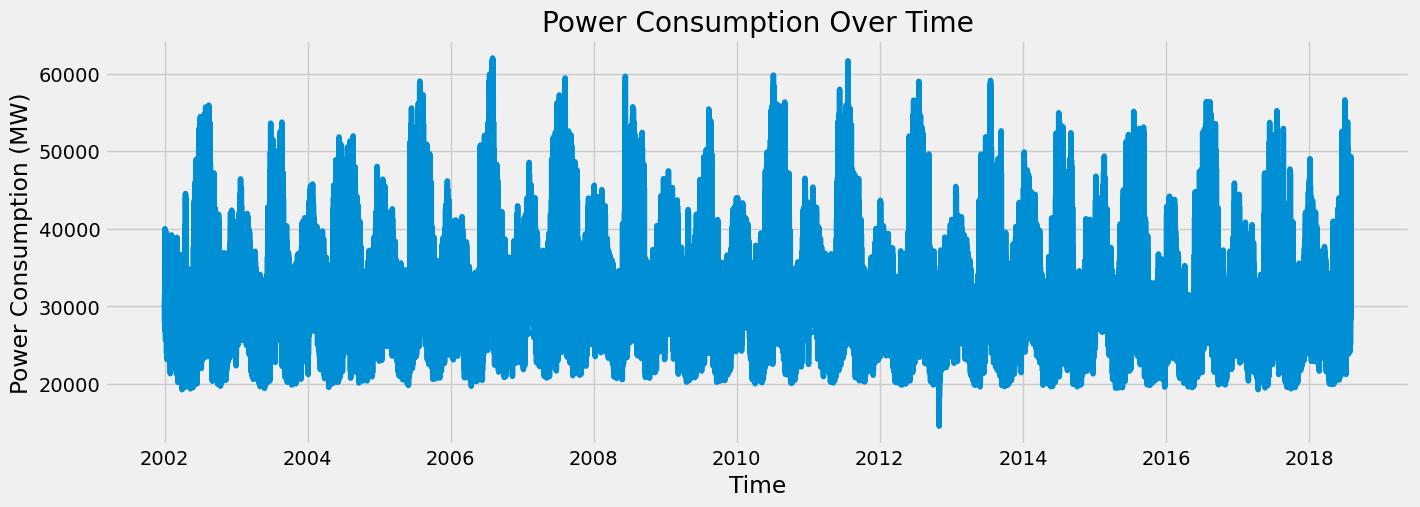

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(df.index, df['PJME_MW'])

ax.set_title('Power Consumption Over Time')
ax.set_xlabel('Time')
ax.set_ylabel('Power Consumption (MW)')

#ax.grid(False)

plt.show();

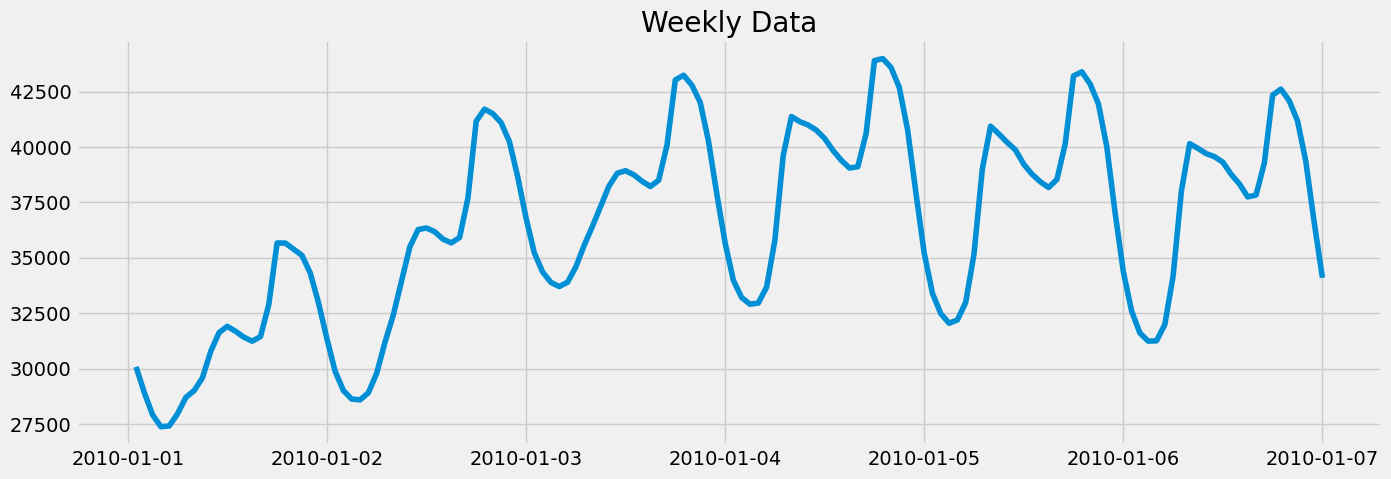

In [8]:
start_week = pd.to_datetime('2010-01-01')
end_week = start_week + pd.DateOffset(days=6)

filtered_df = df.loc[(df.index > start_week) & (df.index <= end_week)].sort_index()

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(filtered_df.index, filtered_df['PJME_MW'])

ax.set_title('Weekly Data')

plt.show();

# Feature Engineering

## Exhaust every data you can get from the data column

In [9]:
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
df['quarter'] = df.index.quarter
df['month'] = df.index.month
df['year'] = df.index.year
df['weekofyear'] = df.index.isocalendar().week

In [16]:
df.head(30)

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365,31,1
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365,31,1
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365,31,1
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365,31,1
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365,31,1
2002-12-31 06:00:00,26222.0,6,1,4,12,2002,365,31,1
2002-12-31 07:00:00,28702.0,7,1,4,12,2002,365,31,1
2002-12-31 08:00:00,30698.0,8,1,4,12,2002,365,31,1
2002-12-31 09:00:00,31800.0,9,1,4,12,2002,365,31,1


# EDA II

## Checking usage conscentrations based on time

### Hourly

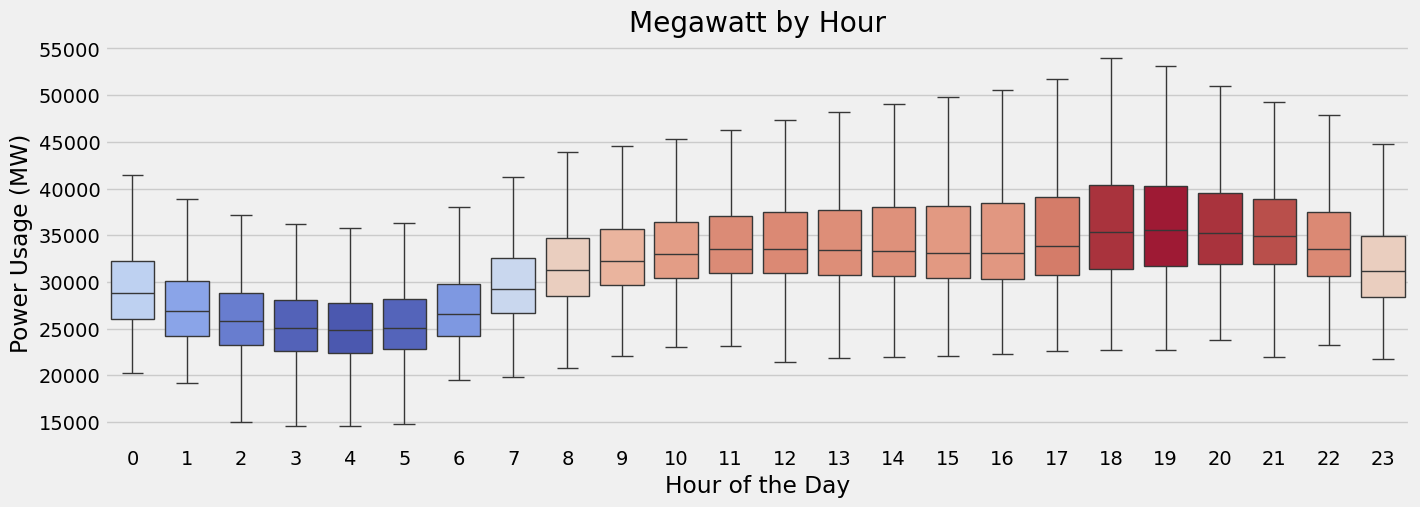

In [10]:
# Get median/hour
hourly_median = df.groupby('hour')['PJME_MW'].median()
# Normalizing the value for proper gradient
norm = (hourly_median - hourly_median.min()) / (hourly_median.max() - hourly_median.min())

# Setting colormap based on normalized values
palette = sns.color_palette('coolwarm', as_cmap=True)
palette_list = [palette(i) for i in norm]

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.boxplot(data=df, x='hour', y='PJME_MW', hue='hour', ax=ax, showfliers=False, palette=palette_list, legend=False)

ax.set_title('Megawatt by Hour')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Power Usage (MW)')

plt.show();

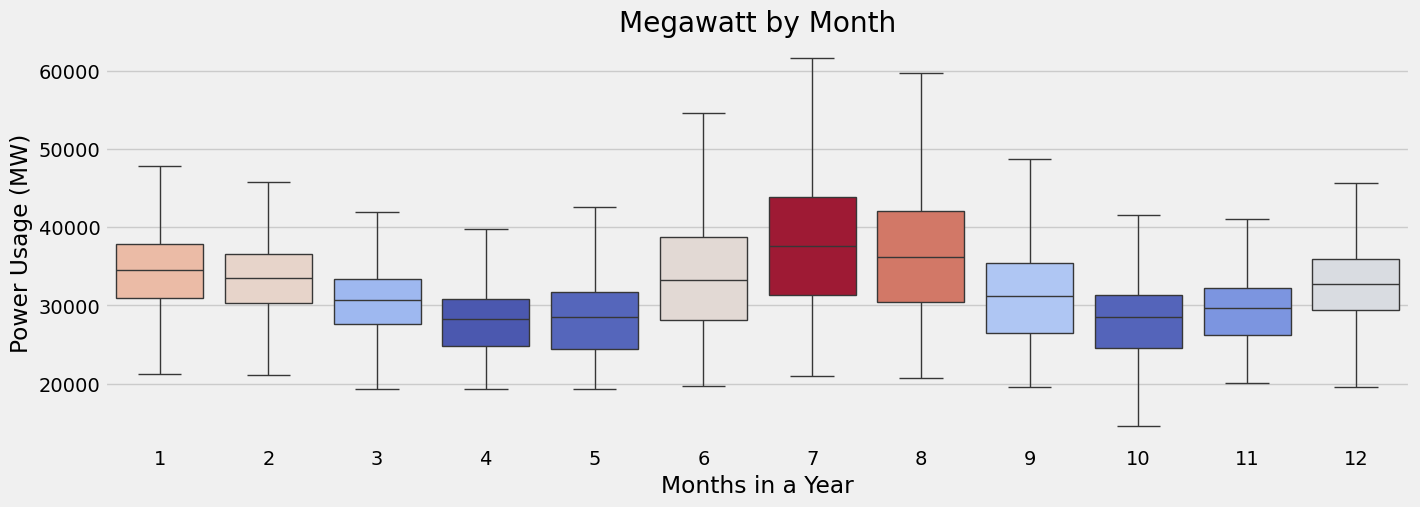

In [14]:
# Get median/hour
monthly_median = df.groupby('month')['PJME_MW'].median()
# Normalizing the value for proper gradient
norm = (monthly_median - monthly_median.min()) / (monthly_median.max() - monthly_median.min())

# Setting colormap based on normalized values
palette = sns.color_palette('coolwarm', as_cmap=True)
palette_list = [palette(i) for i in norm]

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.boxplot(data=df, x='month', y='PJME_MW', hue='month', ax=ax, showfliers=False, palette=palette_list, legend=False)

ax.set_title('Megawatt by Month')
ax.set_xlabel('Months in a Year')
ax.set_ylabel('Power Usage (MW)')

plt.show();

## Splitting Data

In [38]:
date_split = pd.to_datetime('2015-01-01')

train = df.loc[df.index < date_split]
test = df.loc[df.index >= date_split]

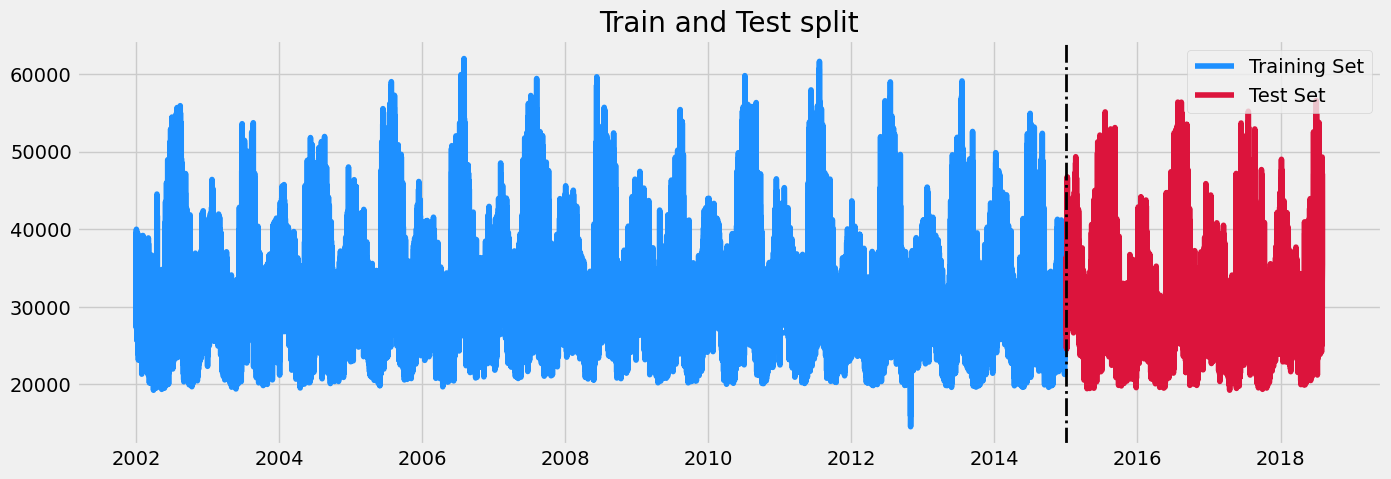

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

ax.plot(train.index, train['PJME_MW'], color='dodgerblue', label='Training Set')
ax.plot(test.index, test['PJME_MW'], color='crimson', label= 'Test Set')

ax.legend()

# Some Aestetics
ax.axvline(date_split, color='black', ls='-.', lw='2')
ax.set_title('Train and Test split');

plt.show()